In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [242]:
data = pd.read_csv('beer_profile_and_ratings.csv')

In [243]:
data.head()

Name    Style  \
0                         Amber  Altbier   
1                    Double Bag  Altbier   
2                Long Trail Ale  Altbier   
3                  Doppelsticke  Altbier   
4  Sleigh'r Dark Doüble Alt Ale  Altbier   

                                            Brewery  \
0                               Alaskan Brewing Co.   
1                            Long Trail Brewing Co.   
2                            Long Trail Brewing Co.   
3  Uerige Obergärige Hausbrauerei GmbH / Zum Uerige   
4                           Ninkasi Brewing Company   

                                    Beer Name (Full)  \
0                  Alaskan Brewing Co. Alaskan Amber   
1                  Long Trail Brewing Co. Double Bag   
2              Long Trail Brewing Co. Long Trail Ale   
3  Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...   
4  Ninkasi Brewing Company Sleigh'r Dark Doüble A...   

                                         Description  ABV  Min IBU  Max IBU  \
0  Notes:Richly malty and long on the palate, wit...  5.3       25       50   
1  Notes:This malty, full-bodied double alt is al...  7.2       25       50   
2  Notes:Long Trail Ale is a full-bodied amber al...  5.0       25       50   
3                                             Notes:  8.5       25       50   
4  Notes:Called 'Dark Double Alt' on the label.Se...  7.2       25       50   

   Astringency  Body  ...  Fruits  Hoppy  Spices  Malty  review_aroma  \
0           13    32  ...      33     57       8    111      3.498994   
1           12    57  ...      24     35      12     84      3.798337   
2           14    37  ...      10     54       4     62      3.409814   
3           13    55  ...      49     40      16    119      4.148098   
4           25    51  ...      11     51      20     95      3.625000   

   review_appearance  review_palate  review_taste  review_overall  \
0           3.636821       3.556338      3.643863        3.847082   
1           3.846154       3.904366      4.024948        4.034304   
2           3.667109       3.600796      3.631300        3.830239   
3           4.033967       4.150815      4.205163        4.005435   
4           3.973958       3.734375      3.765625        3.817708   

   number_of_reviews  
0                497  
1                481  
2                377  
3                368  
4                 96  

[5 rows x 25 columns]

In [244]:
data.describe()

ABV      Min IBU      Max IBU  Astringency         Body  \
count  3197.000000  3197.000000  3197.000000  3197.000000  3197.000000   
mean      6.526688    21.180482    38.986863    16.515796    46.129496   
std       2.546997    13.242242    21.355281    10.410661    25.947842   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000    15.000000    25.000000     9.000000    29.000000   
50%       6.000000    20.000000    35.000000    14.000000    40.000000   
75%       7.600000    25.000000    45.000000    21.000000    58.000000   
max      57.500000    65.000000   100.000000    81.000000   175.000000   

           Alcohol       Bitter        Sweet         Sour        Salty  \
count  3197.000000  3197.000000  3197.000000  3197.000000  3197.000000   
mean     17.055990    36.364404    58.270879    33.145449     1.017204   
std      17.331334    25.791152    34.281310    35.780172     2.132651   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       6.000000    17.000000    33.000000    11.000000     0.000000   
50%      11.000000    31.000000    54.000000    22.000000     0.000000   
75%      22.000000    52.000000    77.000000    42.000000     1.000000   
max     139.000000   150.000000   263.000000   284.000000    48.000000   

            Fruits        Hoppy       Spices        Malty  review_aroma  \
count  3197.000000  3197.000000  3197.000000  3197.000000   3197.000000   
mean     38.529559    40.924617    18.345637    75.330935      3.638789   
std      32.296646    30.403641    23.756582    39.909338      0.503209   
min       0.000000     0.000000     0.000000     0.000000      1.509615   
25%      12.000000    18.000000     4.000000    45.000000      3.422559   
50%      29.000000    33.000000    10.000000    73.000000      3.720183   
75%      60.000000    56.000000    23.000000   103.000000      3.978000   
max     175.000000   172.000000   184.000000   239.000000      5.000000   

       review_appearance  review_palate  review_taste  review_overall  \
count        3197.000000    3197.000000   3197.000000     3197.000000   
mean            3.754393       3.660428      3.702496        3.747522   
std             0.403416       0.449937      0.510361        0.444288   
min             1.571429       1.285714      1.214286        1.136364   
25%             3.604651       3.470021      3.500000        3.566667   
50%             3.833333       3.741667      3.791667        3.830239   
75%             4.000000       3.965587      4.033333        4.032847   
max             4.666667       5.000000      5.000000        5.000000   

       number_of_reviews  
count        3197.000000  
mean          233.284955  
std           361.811847  
min             1.000000  
25%            23.000000  
50%            93.000000  
75%           284.000000  
max          3290.000000

Questions I would like to answer:  
1) What are the average overall reviews and variance for different beer styles?  
2) Is ABV correlated to overall review score?  
3) Which breweries have the most reviews and does this correlate with an increase or decrease of overall review score?

## Average Overall Score for Style

We can make a new dataframe with all the information in a useful order (sorted by mean descending) we want by chaining functions. 

In [245]:
style_data = (data
             .groupby('Style', as_index=False)['review_overall']
             .agg(['mean', 'std'])
             .sort_values('mean', ascending=False)
             .assign(num_of_reviews = lambda x: data.groupby(['Style'])['number_of_reviews'].sum())
             )

In [246]:
style_data.head(10)

mean       std  num_of_reviews
Style                                                        
IPA - New England          4.435296  0.153451             724
Wild Ale                   4.233521  0.222140            5219
Stout - American Imperial  4.178492  0.192530           23316
Lambic - Traditional       4.139164  0.349601             878
IPA - Imperial             4.090109  0.253199           33253
Pale Ale - American        4.085476  0.248513           11299
IPA - American             4.078092  0.267497           34260
Stout - Russian Imperial   4.056102  0.268708           17332
Farmhouse Ale - Saison     4.052977  0.164337           10769
Porter - Imperial          4.052149  0.269152            3303

In [247]:
style_data.tail(10)

mean       std  num_of_reviews
Style                                                      
Happoshu                 3.309707  0.770303             118
Kvass                    3.295742  0.479096             199
Chile Beer               3.287831  0.648476            1649
Lager - European Pale    3.181134  0.272432           11615
Lager - Japanese Rice    3.154343  0.565730            1060
Lager - Adjunct          3.002296  0.419401           16343
Lager - European Strong  2.851297  0.432513            1782
Lager - Light            2.736691  0.407554            9287
Low Alcohol Beer         2.607944  0.526681             804
Lager - Malt Liquor      2.479296  0.474661            2608

In [248]:
# make a list with the top 10 highest rated styles in our style_data dataframe
style_data_head = (style_data
                  .head(10)
                  .index
                  .to_list()
                  )

In [249]:
# make a list with the bottom 5 lowest rated styles in our style_data dataframe
style_data_tail = (style_data
                  .tail(5)
                  .index
                  .to_list()
                  )

In [250]:
# create dataframe with all rows in data that have styles matching our style_data_head and style_data_tail lists
top_bottom_data = (data
              .query('Style == @style_data_head')
              .append(data.query('Style == @style_data_tail'))
             )

<IPython.core.display.Javascript object>


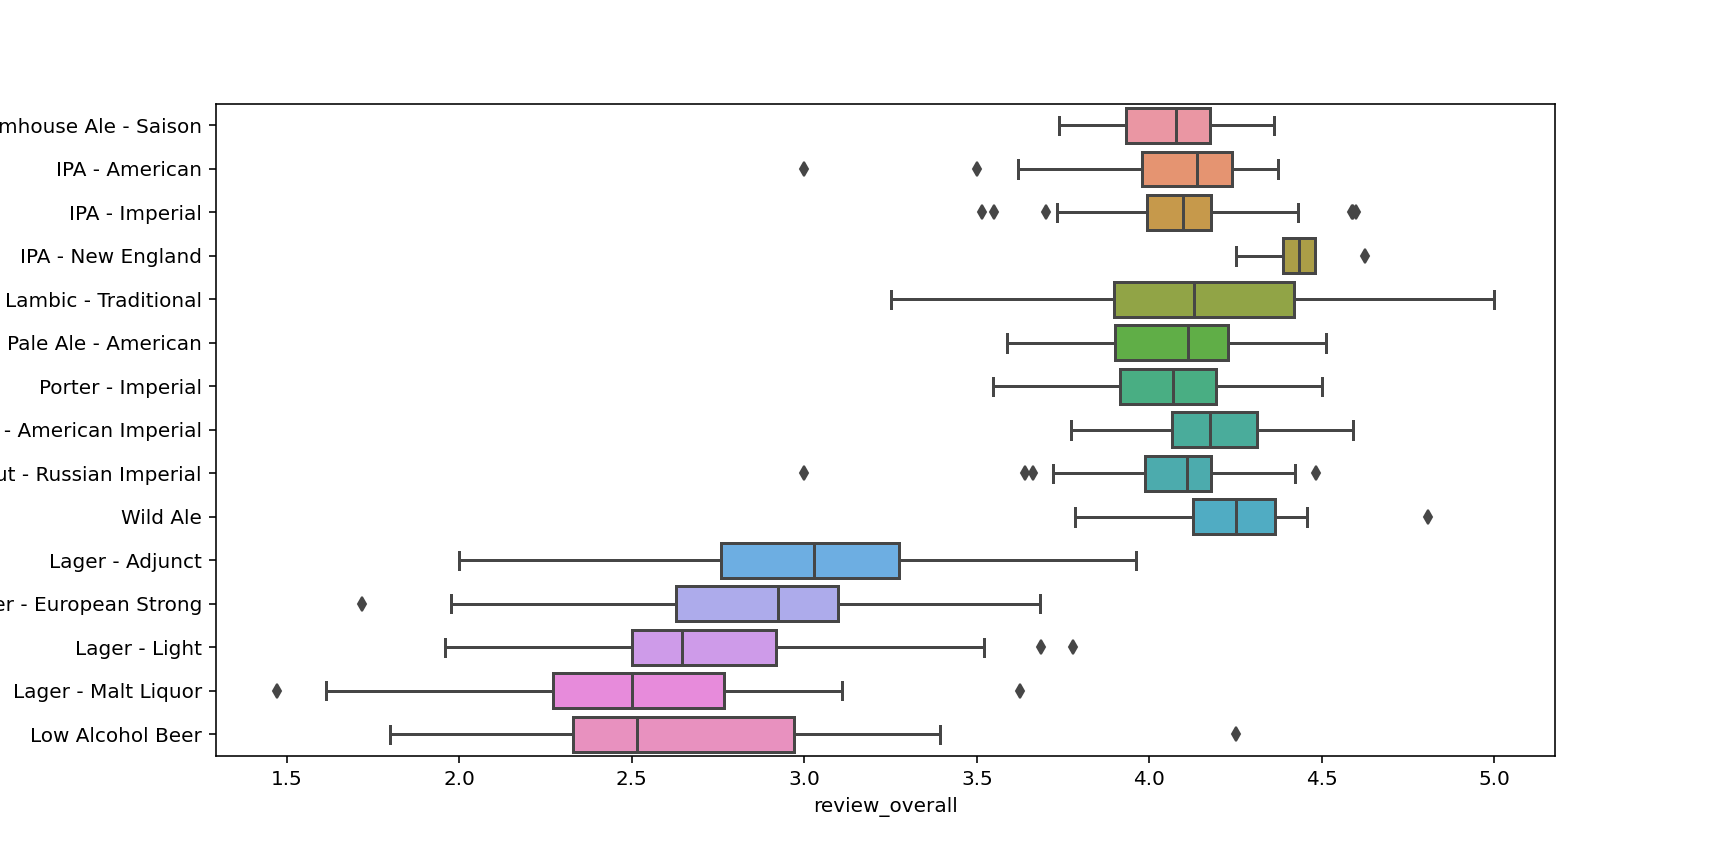

In [259]:
# create box and whisker plot for top 10 and bottom 5 beer style reviews
# set figure size
plt.figure(figsize=(12,6))
# use seaborn and set boxplot horizontally for easier reading categories
sns.boxplot(x='review_overall', y='Style', data=top_bottom_data)
plt.show()

A lot of overlap in the top styles, although NEIPA is far above the pack but also with relaively fewer number of reviews. All of the IPA categories could probably also be combined to show a better picture of that style overall. Lambic also has a relatively low number of reviews but interesting to see the whisker on that plot goes all the way to 5.0.

The lowest scorers tend to have a pretty large range that scores fall into (wider whiskers than most of the high score categories), so there are some middling scores out there for those categories, but the average score is still relatively low.

## Is ABV Correlated to Overall Review Score?

In [260]:
fig.clf()

<IPython.core.display.Javascript object>


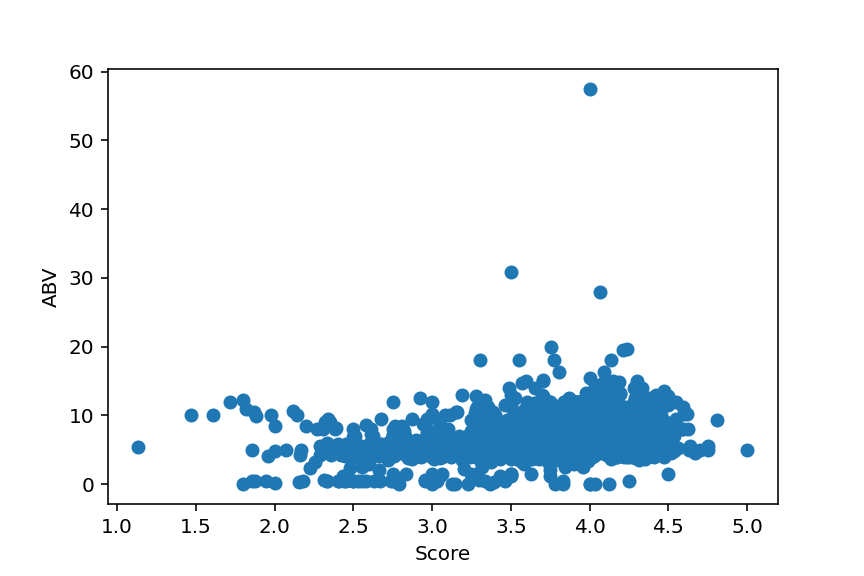

In [263]:
plt.scatter(data.review_overall, data.ABV)
plt.xlabel('Score')
plt.ylabel('ABV')
plt.show()

We can see there are obviously some outliers. While the highest ABV beer commercially released is claimed to be 67.5% abv (called Snake Venom), I don't think it's useful for our purposes to include those kinds of beers. Many states have legal ABV limits below 20% abv, and we can see most points fall into this range anyway, so I think we'll be able to see the most information by focusing on only beers below 20% abv.

In [264]:
reg_abv = data[data['ABV'] < 20.0]

In [265]:
fig.clf()

<IPython.core.display.Javascript object>


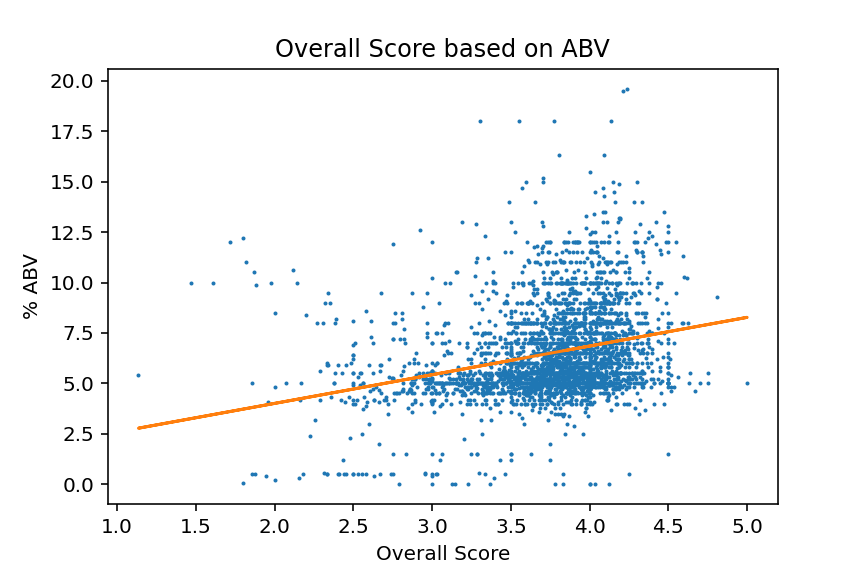

In [287]:
# create scatterplot
plt.plot('review_overall', 'ABV', data=reg_abv, linestyle='', marker='o', markersize=1)

# create trend line and plot it over scatter
z = np.polyfit(reg_abv.review_overall, reg_abv.ABV, 1)
p = np.poly1d(z)
plt.plot(reg_abv.review_overall, p(reg_abv.review_overall))

# label axes and title
plt.xlabel('Overall Score')
plt.ylabel('% ABV')
plt.title('Overall Score based on ABV')
plt.show()

In [279]:
# find slope using trendline
z[0]

1.4223318211820908

In [284]:
# check correlation coefficient
corr, _ = pearsonr(reg_abv.review_overall, reg_abv.ABV)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.275


As we could tell from the scatterplot, and confirmed by the correlation coefficient, there is only a weak correlation between ABV and the overall score of a beer.

Because ABV often is mostly affecting mouthfeel, I would also like to see if maybe there is more correlation on that particular score.

<IPython.core.display.Javascript object>


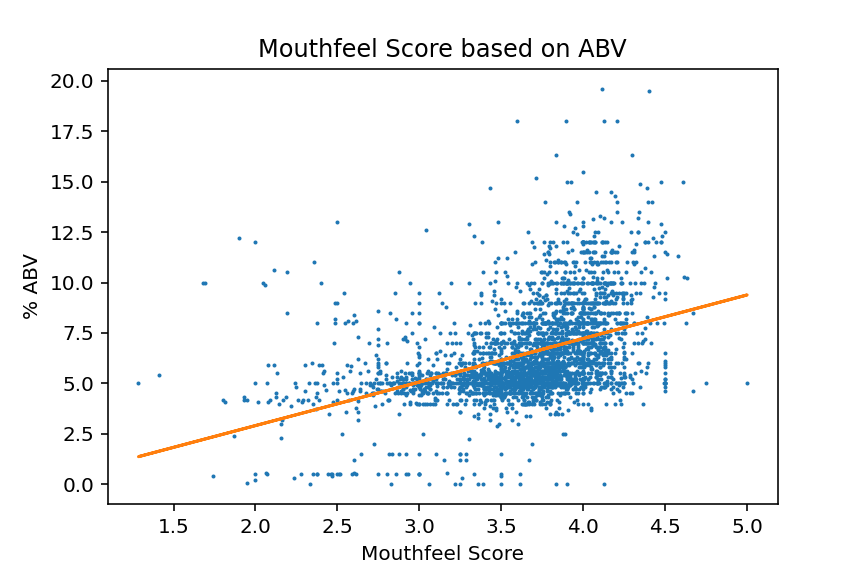

In [288]:
fig.clf()
# create scatterplot
plt.plot('review_palate', 'ABV', data=reg_abv, linestyle='', marker='o', markersize=1)

# create trend line and plot it over scatter
z = np.polyfit(reg_abv.review_palate, reg_abv.ABV, 1)
p = np.poly1d(z)
plt.plot(reg_abv.review_palate, p(reg_abv.review_palate))

# label axes and title
plt.xlabel('Mouthfeel Score')
plt.ylabel('% ABV')
plt.title('Mouthfeel Score based on ABV')
plt.show()

In [289]:
z[0]

2.1590912013534376

In [290]:
# check correlation coefficient
corr, _ = pearsonr(reg_abv.review_palate, reg_abv.ABV)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.422


We can see a stronger correlation between abv and mouthfeel score than for the overall score, though still not particularly srong. In any case, there does appear to be some slight benefit to having a higher abv in general, especially in regard to mouthfeel.

## Does having more reviews increase or decrease a brewery's overall review score?

To answer this question, I'll need to sum the number of reviews for each brewery and check that against their average overall beer scores. This question could also be asked on a beer by beer basis, but I'm more interested in each brewery as a whole here.